# Text Visualization - Metin Görselleştirme

In [2]:
import pandas as pd
data = pd.read_csv("train.tsv", sep = "\t")

In [3]:
data.head()

PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment  
0          1  
1          2  
2          2  
3          2  
4          2

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [5]:
#buyuk-kucuk donusumu
data['Phrase'] = data['Phrase'].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [6]:
#noktalama işaretleri
data['Phrase'] = data['Phrase'].str.replace('[^\w\s]','')

In [7]:
#sayılar
data['Phrase'] = data['Phrase'].str.replace('\d','')

In [8]:
#stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')
data['Phrase'] = data['Phrase'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\halil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
#seyreklerin silinmesi
sil = pd.Series(' '.join(data['Phrase']).split()).value_counts()[-1000:]
data['Phrase'] = data['Phrase'].apply(lambda x: " ".join(x for x in x.split() if x not in sil))

In [10]:
#lemmi
from textblob import Word
#nltk.download('wordnet')
data['Phrase'] = data['Phrase'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

In [11]:
data["Phrase"].head(10)

0    series demonstrating adage good goose also goo...
1                series demonstrating adage good goose
2                                               series
3                                                     
4                                               series
5                       demonstrating adage good goose
6                                                     
7                       demonstrating adage good goose
8                                                     
9                       demonstrating adage good goose
Name: Phrase, dtype: object

## Terim Frekansı

In [17]:
tf1= (data["Phrase"].head(80000)).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()

In [18]:
tf1.columns = ["words","tf"]

In [19]:
tf1.head()

words      tf
0          good  1107.0
1        amount    91.0
2         goose    34.0
3          also   326.0
4  occasionally   102.0

In [20]:
tf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9663 entries, 0 to 9662
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   words   9663 non-null   object 
 1   tf      9663 non-null   float64
dtypes: float64(1), object(1)
memory usage: 151.1+ KB


In [22]:
tf1.nunique()

words    9663
tf        340
dtype: int64

## Barplot - Sütun Grafiği

In [25]:
a = tf1[tf1["tf"]>1000]

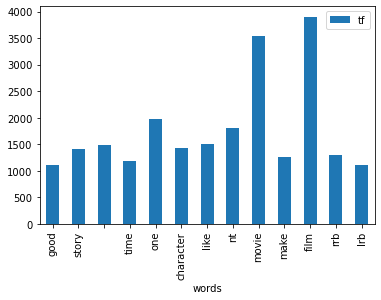

In [27]:
a.plot.bar(x ="words", y ="tf");

## Wordcloud - Kelime Bulutu

In [28]:
!pip install wordcloud

In [29]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [31]:
text = data["Phrase"][0]

In [63]:
wordcloud = WordCloud().generate(text)
# ?wordcloud

Type:        WordCloud
String form: <wordcloud.wordcloud.WordCloud object at 0x000002703AD74B80>
File:        c:\users\halil\anaconda3\lib\site-packages\wordcloud\wordcloud.py
Docstring:  
Word cloud object for generating and drawing.

Parameters
----------
font_path : string
    Font path to the font that will be used (OTF or TTF).
    Defaults to DroidSansMono path on a Linux machine. If you are on
    another OS or don't have this font, you need to adjust this path.

width : int (default=400)
    Width of the canvas.

height : int (default=200)
    Height of the canvas.

prefer_horizontal : float (default=0.90)
    The ratio of times to try horizontal fitting as opposed to vertical.
    If prefer_horizontal < 1, the algorithm will try rotating the word
    if it doesn't fit. (There is currently no built-in way to get only
    vertical words.)

mask : nd-array or None (default=None)
    If not None, gives a binary mask on where to draw words. If mask is not
    None, width and height

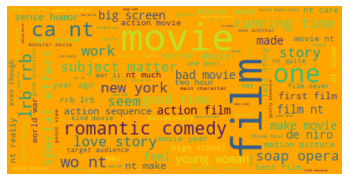

In [105]:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

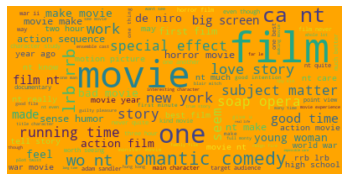

In [106]:
wordcloud = WordCloud(background_color="orange", max_font_size=50, max_words=100).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [121]:
# Oluştrulan wordcloud u png olarak kaydetme işlemi yaptık.
wordcloud.to_file("kelime_bulutu.png");

In [109]:
# Tüm Metinler için

text1 = " ".join(i for i in data.Phrase)
# text1

'series demonstrating adage good goose also good gander occasionally amuses none amount much story series demonstrating adage good goose series  series demonstrating adage good goose  demonstrating adage good goose  demonstrating adage good goose demonstrating adage demonstrating adage  adage good goose  good goose  good goose  good goose good goose  goose goose also good gander occasionally amuses none amount much story also good gander occasionally amuses none amount much story also also good gander occasionally amuses none amount much story gander occasionally amuses none amount much story gander occasionally amuses none amount much story gander gander gander  occasionally amuses none amount much story     occasionally amuses none amount much story occasionally amuses none amount much story amuses none amount much story  none amount much story none amount much story amount much story amount much story amount much story  much story much story story story  quiet introspective entertai

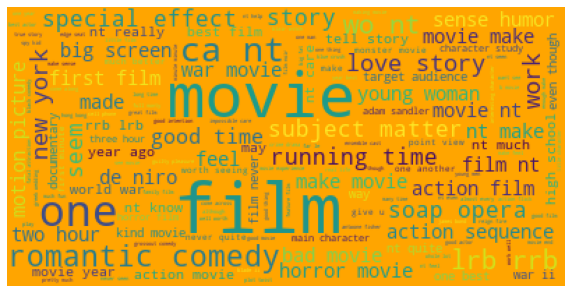

In [120]:
wordcloud = WordCloud(background_color="orange", max_font_size=50).generate(text1)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation="antialiased")
plt.axis("off")
plt.show()
wordcloud.to_file("kelime_bulutu1.png");

## Şablonlara Göre Word Cloud

In [158]:
tr_mask = np.array(Image.open("tr.png"))

In [159]:
tr_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

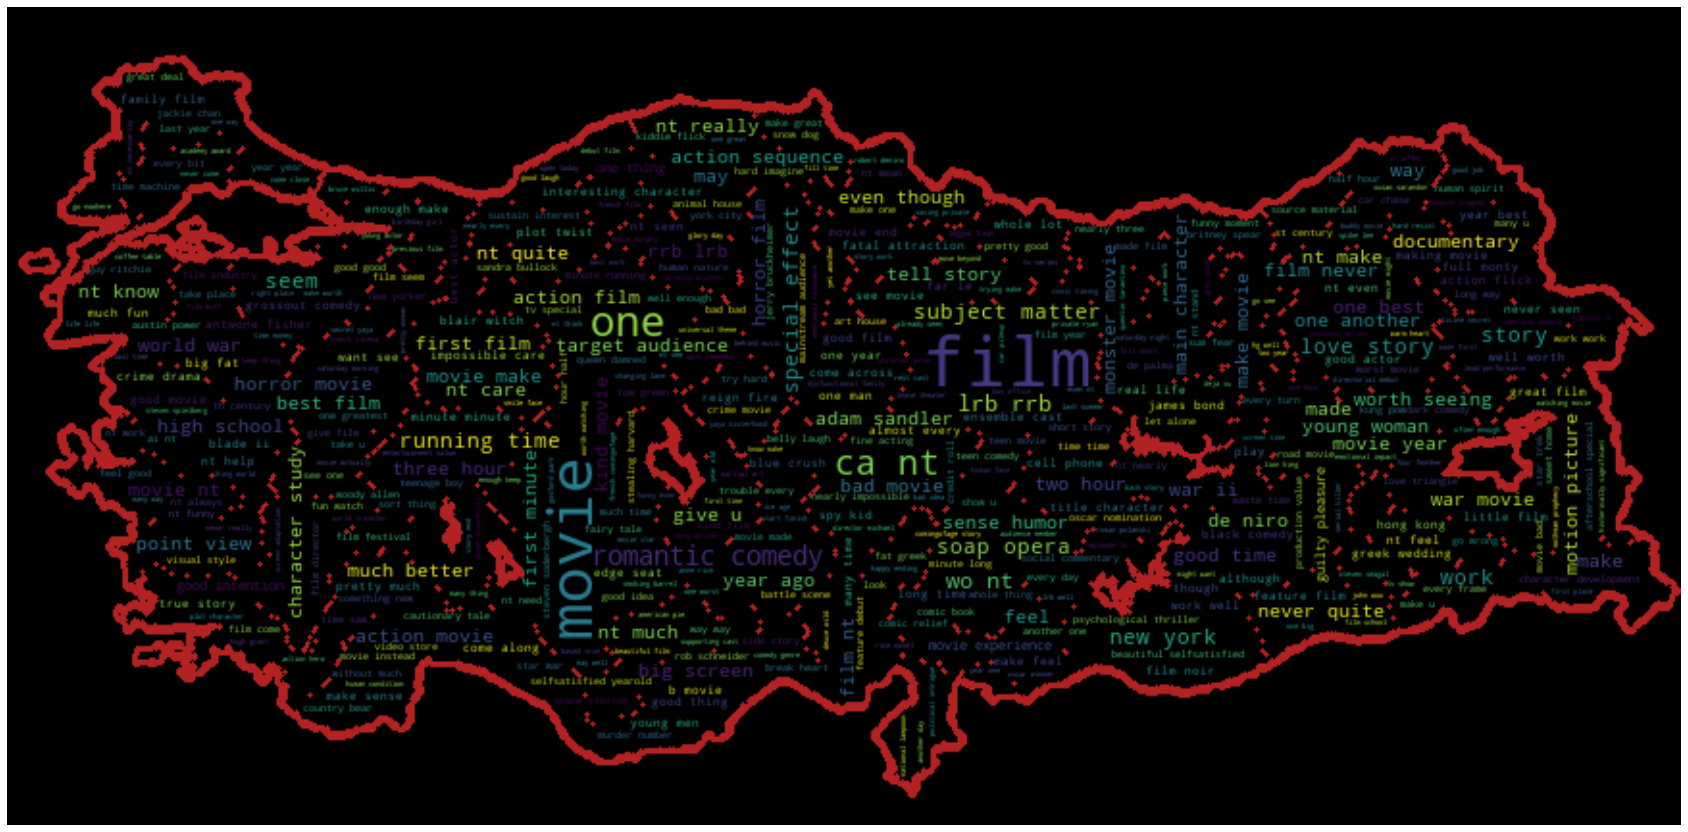

In [171]:
wordcloud = WordCloud(background_color="black",
                      max_words = 1000,
                      mask=tr_mask,
                      contour_width = 3,
                      contour_color="firebrick").generate(text1)
plt.figure(figsize=[30,20])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("tr1.png");